#Instalando tesseract

In [1]:
#sudo apt install tesseract-ocr

#Instalando o pytesseract no python

In [2]:
# pip install pytesseract

#Pegando o tesseract em português através do github

Primeiro criar uma pasta onde o suporte para o portugues será salvo

In [3]:
# mkdir tessdata

Pegar o arquivo do github

In [4]:
# wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

#Imports

In [2]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# from google.colab.patches import cv2_imshow

In [20]:
cv2.__version__

'4.7.0'

In [4]:
pytesseract.__version__

'0.3.10'

#Leitura de imagem

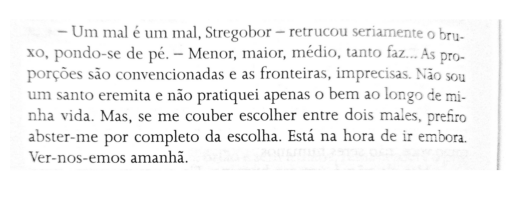

In [3]:
# imagem = cv2.imread('/data/input/trecho_livro.png')
imagem = cv2.imread('data/input/trecho_livro.png')
plt.imshow(imagem)
plt.axis('off')
plt.show()

In [6]:
cv2.imshow('telateste',imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
texto = pytesseract.image_to_string(imagem)
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente 0 bry.
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... A
porgdes sao convencionadas e as fronteiras, imprecisas.
um santo eremita e nao pratiquei apenas 0 bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro

abster-me por completo da escolha. Esta na hora de ir embora.
Ver-nos-emos amanha.

 

S pro-

40 SOU

 

 



Modos de segmentação de página

In [11]:
# !tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [5]:
config_tesseract = '--tessdata-dir tessdata --psm 6'

In [6]:
texto = pytesseract.image_to_string(imagem, lang='por',config=config_tesseract)
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente o bry-
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... As pro-
porções são convencionadas e as fronteiras, imprecisas. Não sou
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro
abster-me por completo da escolha. Está na hora de ir embora. ;
Ver-nos-emos amanhã. |



#Detectando textos na placa de carro

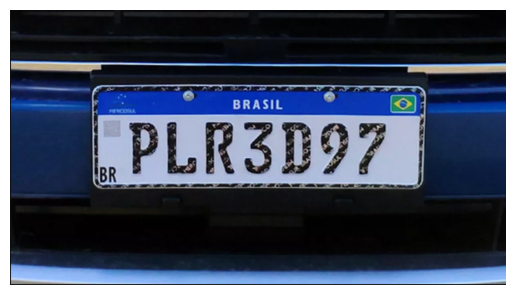

In [14]:
imagem_placa = cv2.imread('data/input/placa_carro1.png')
imagem_placa = cv2.cvtColor(imagem_placa,cv2.COLOR_BGR2RGB)
plt.imshow(imagem_placa)
plt.axis('off')
plt.show()


Aplicando a escala de cinza, para limitar os canais de cores

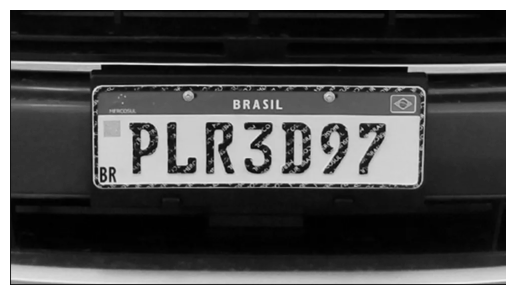

In [43]:
gray = cv2.cvtColor(imagem_placa, cv2.COLOR_BGR2GRAY)
# cv2_imshow(gray)
plt.imshow(gray,cmap = 'gray')
plt.axis('off')
plt.show()

In [16]:
config_tess = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(gray, lang='por', config = config_tess)
print(texto)

#Tratamento das imagens

* Limiarização simples:

Esta técnica consiste em transformar uma imagem em escala de cinza para uma imagem preto e branco

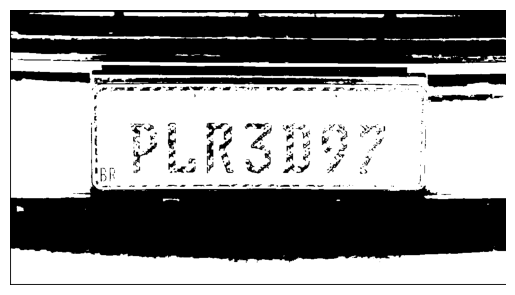

In [30]:
limiar = 25
valor, lim_simples = cv2.threshold(gray, limiar, 255, cv2.THRESH_BINARY)
# cv2_imshow(lim_simples)
plt.imshow(lim_simples, cmap = 'gray')
plt.axis('off')
plt.show()

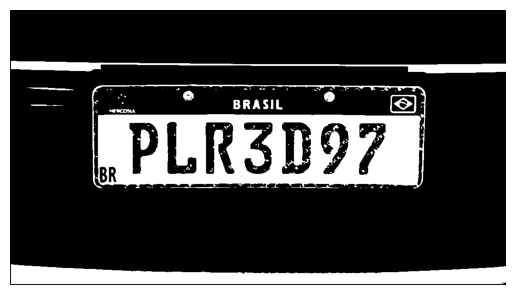

In [24]:
limiar = 127
valor, lim_simples = cv2.threshold(gray, limiar, 255, cv2.THRESH_BINARY)
# cv2_imshow(lim_simples)

plt.imshow(lim_simples, cmap = 'gray')
plt.axis('off')
plt.show()

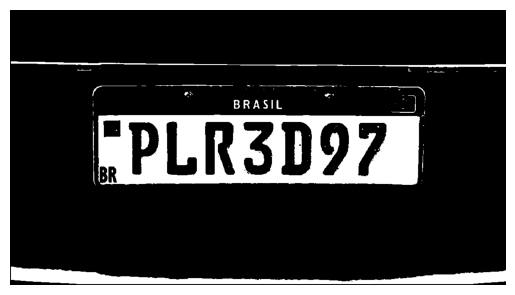

In [55]:
limiar = 180
valor, lim_simples = cv2.threshold(gray, limiar, 255, cv2.THRESH_BINARY)
# cv2_imshow(lim_simples)
plt.imshow(lim_simples, cmap = 'gray')
plt.axis('off')
plt.show()


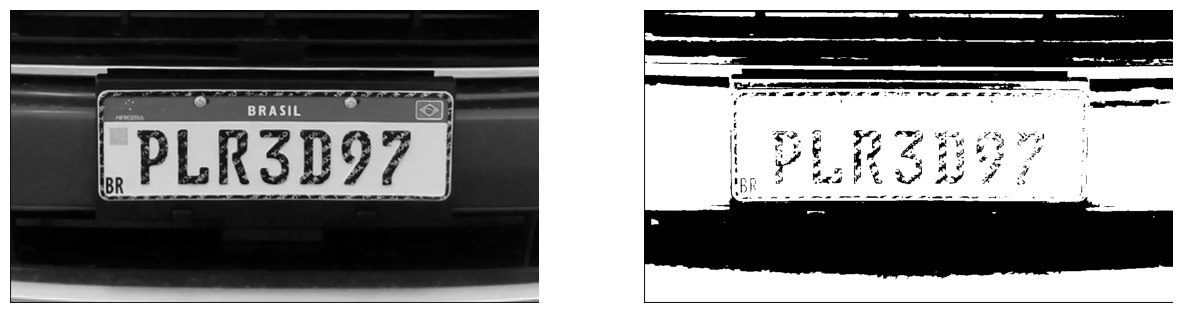

In [34]:
#gray
#lim_simples

fig = plt.figure(figsize = (15 , 7 ))


ax1=  fig.add_subplot(1,2,1)
# add_subplot(lines,colums, position)

plt.imshow(gray, cmap = 'gray')
plt.axis('off')

ax2=  fig.add_subplot(1,2,2)
plt.imshow(lim_simples, cmap = 'gray')
plt.axis('off')
plt.show()


def picture(fig, image,position):
    ax2 =  fig.add_subplot(position)
    plt.imshow(imagem, cmap = 'gray')
    plt.axis('off')






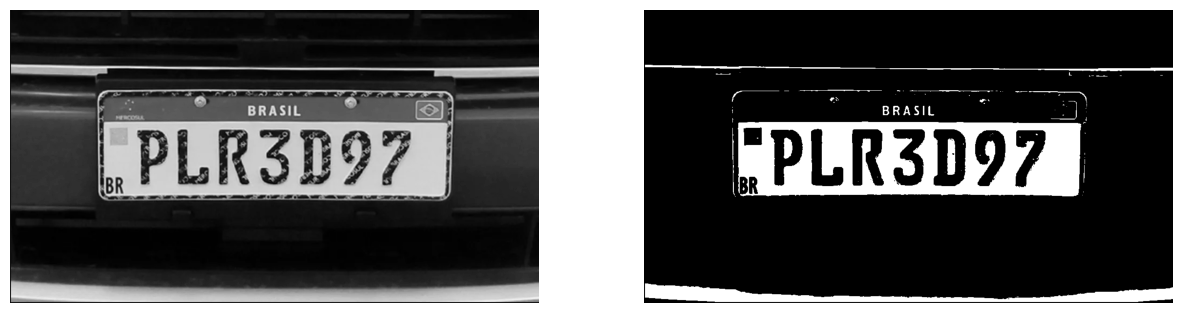

In [59]:
def picture(fig, image,position):
    ax2 =  fig.add_subplot(position[0],position[1],position[2])
    plt.imshow(image, cmap = 'gray')
    plt.axis('off')

lista_imagens = [gray,lim_simples]


teste = plt.figure(figsize = (15 , 7 ))
j = 1
for i in lista_imagens:
    picture(teste, i, [1,2,j])
    j+=1



#Limiarização adaptativa

O processo de limiarização adaptativa é melhor aplicado em imagens que nelas mesmas possuem uma diferença de iluminação e sombra. Isso porque o procedimento de limiarização simples aplicada a essas figuras acaba transformando as regiões sombreadas em pixels pretos e regiões iluminadas em pixels brancos, impedindo a identificação das formas presentes na imagem.



##Limiar adaptativo pela média

Neste método é calculada a média dos pixels vizinhos, caso o valor do pixel em questão seja menor que o valor obtido, o pixel passa a ser preto (0, 0, 0), se não, passa a ser branco (255, 255, 255)

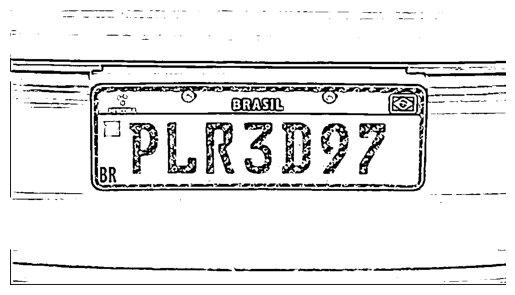

In [28]:
# PARAMETROS:
'''
1 - IMAGEM
2 - VALOR QUE SERÁ TRANSFORMADO CASO O LIMIAR SEJA INFERIOR A MÉDIA
3 - TIPO DE LIMIAR A SER APLICADO
4 - THRESHOLD
5 - TAMANHO DA VIZINHANÇA
6 - VALOR A SER SUBTRAIDO DA MÉDIA FINAL PARA DEFINIR O LIMIAR (CONSTANTE C)
'''
lim_adpt = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
# cv2_imshow(lim_adpt)
plt.imshow(lim_adpt, cmap = 'gray')
plt.axis('off')
plt.show()


##Limiar adaptativo gausseano

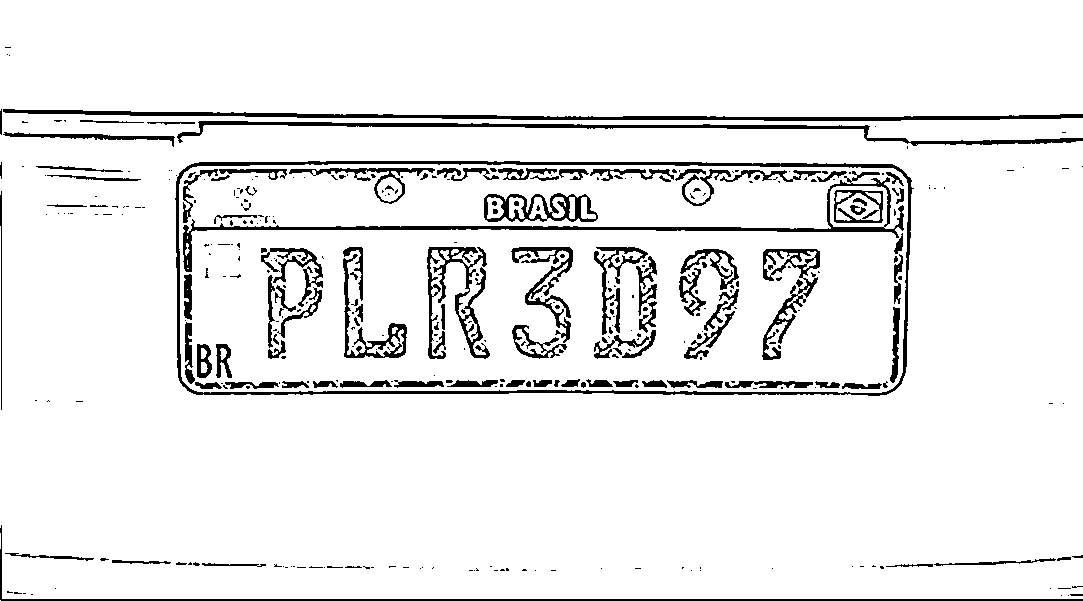

In [20]:
# PARAMETROS:
'''
1 - IMAGEM
2 - VALOR QUE SERÁ TRANSFORMADO CASO O LIMIAR SEJA INFERIOR A MÉDIA
3 - TIPO DE LIMIAR A SER APLICADO
4 - THRESHOLD
5 - TAMANHO DA VIZINHANÇA
6 - VALOR A SER SUBTRAIDO DA MÉDIA FINAL PARA DEFINIR O LIMIAR (CONSTANTE C)
'''
lim_adpt = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
cv2_imshow(lim_adpt)

##Limiarização de Otsu
* Nesta limiarização o valor de limiar é escolhido automaticamente, com a diferença de que o limiar é aplicado globalmente.
*Para a escolha do limiar, é calculado a distribuição das cores em um histograma, e o valor que estiver entre os picos de concentração de cores é o selecionado

In [21]:
imagem

array([[[ 14,  14,  14],
        [ 14,  14,  14],
        [  2,   2,   2],
        ...,
        [  7,   4,   5],
        [  7,   4,   5],
        [  7,   4,   5]],

       [[ 14,  14,  14],
        [ 14,  14,  14],
        [  2,   2,   2],
        ...,
        [  7,   4,   5],
        [  7,   4,   5],
        [  7,   4,   5]],

       [[ 14,  14,  14],
        [ 14,  14,  14],
        [  3,   3,   3],
        ...,
        [  7,   4,   5],
        [  7,   4,   5],
        [  7,   4,   5]],

       ...,

       [[ 14,  14,  14],
        [ 14,  14,  14],
        [142, 145, 144],
        ...,
        [130, 123, 117],
        [129, 122, 116],
        [130, 121, 114]],

       [[ 14,  14,  14],
        [ 14,  14,  14],
        [ 14,  14,  14],
        ...,
        [ 14,  14,  14],
        [ 14,  14,  14],
        [ 14,  14,  14]],

       [[ 14,  14,  14],
        [ 14,  14,  14],
        [ 14,  14,  14],
        ...,
        [ 14,  14,  14],
        [ 14,  14,  14],
        [ 14,  14,  14]]

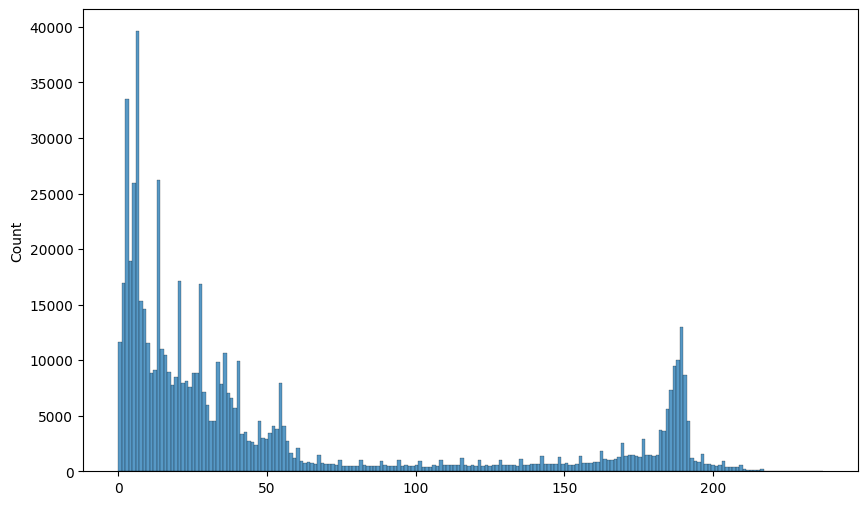

In [22]:
import seaborn as sns
ax = sns.histplot(gray.flatten())
ax.figure.set_size_inches(10,6)

* Há uma alta concentração de pixels com as cores de 0 a 50
* E outra concentração entre 180 a 200

***Pela lógica de otsu, o limiar escolhido será um valor entre 60 a 200***

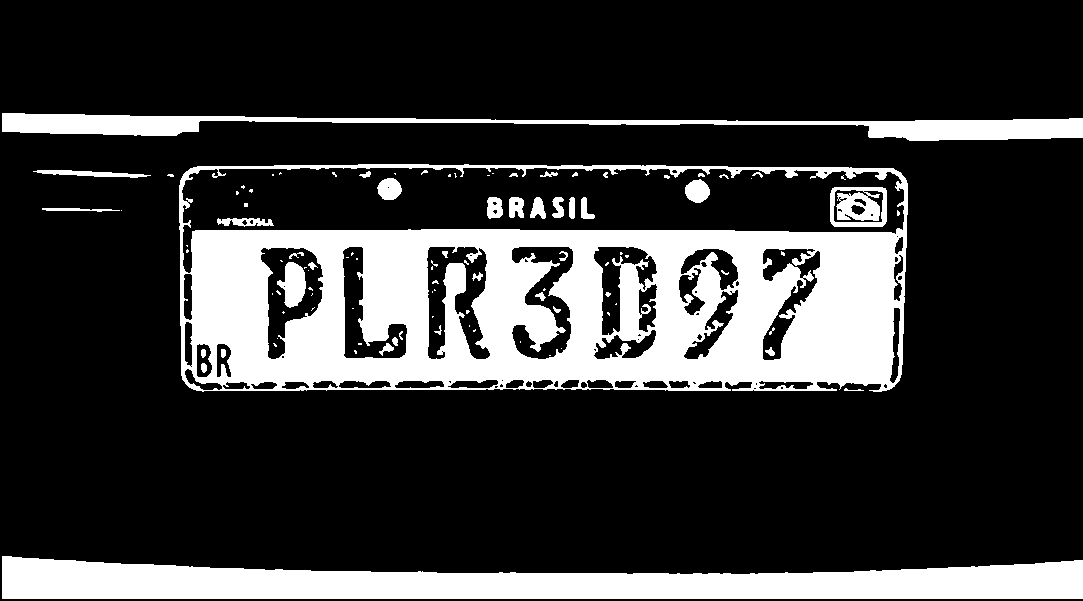

Limiar: 96.0


In [23]:
valor, lim_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(lim_otsu)
print(f'Limiar: {valor}')

In [24]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(lim_otsu, lang='por', config = config_tesseract)
print(texto)

#Transformações morfológicas

In [25]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

##Erosão
A erosão expande os pixels pretos

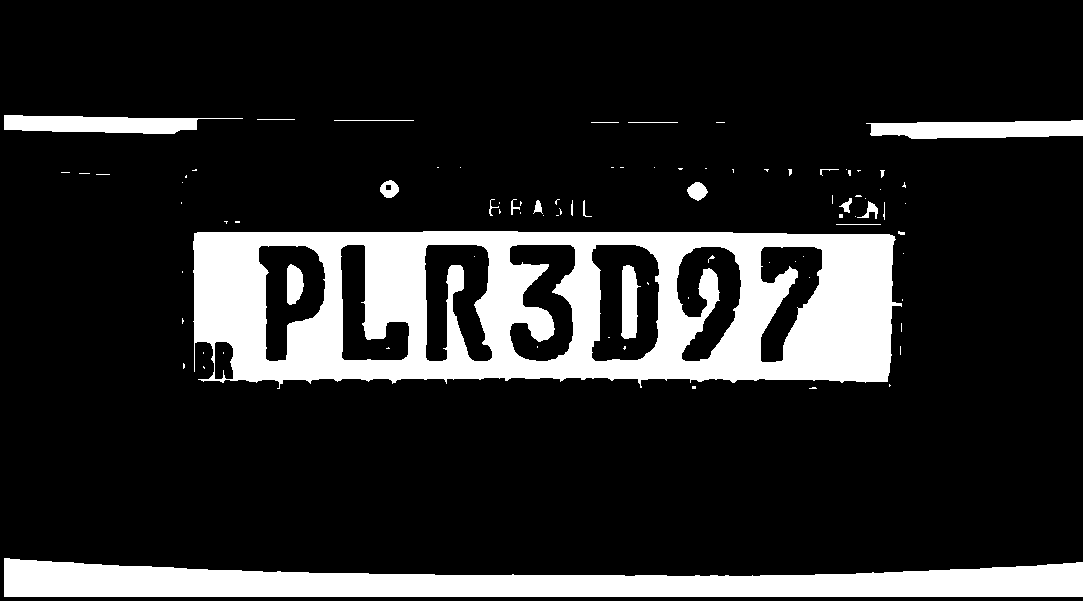

In [26]:
erosao = cv2.erode(lim_otsu, kernel)
cv2_imshow(erosao)

##Dilatação
A dilatação expande os pixels brancos

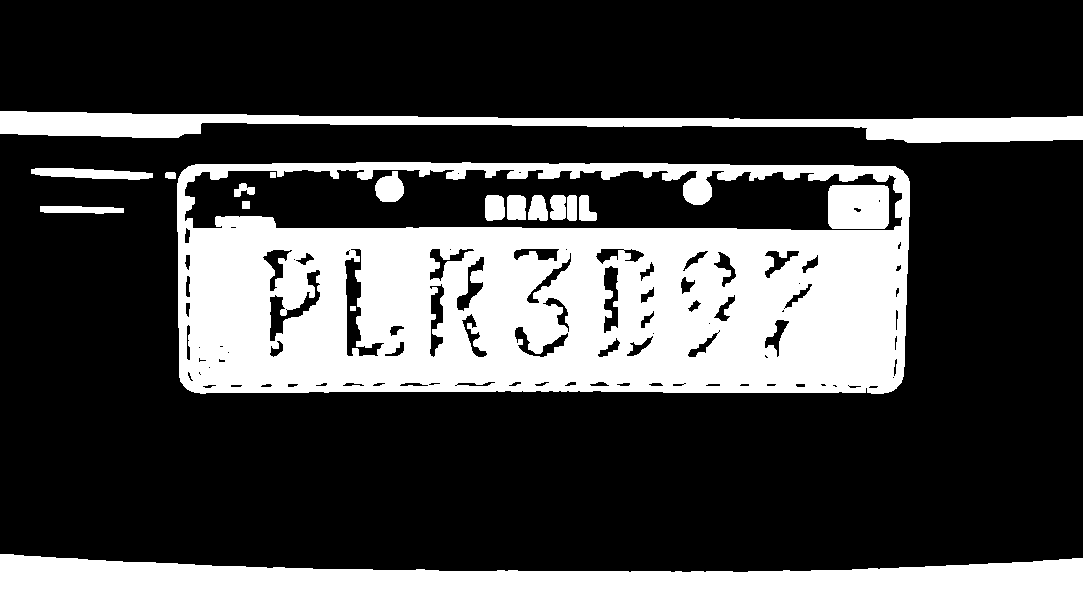

In [27]:
dilatacao = cv2.dilate(lim_otsu, kernel)
cv2_imshow(dilatacao)

##Abertura
* Primeiro é feita uma erosão, os pontos brancos serão eliminados pq as cores pretas serão expandidas
* Após a eliminação dos pontos brancos, os pixels brancos restantes são expandidos para manter a expesura original do objeto

A abertura serve para eliminar ruídos de fora do objeto

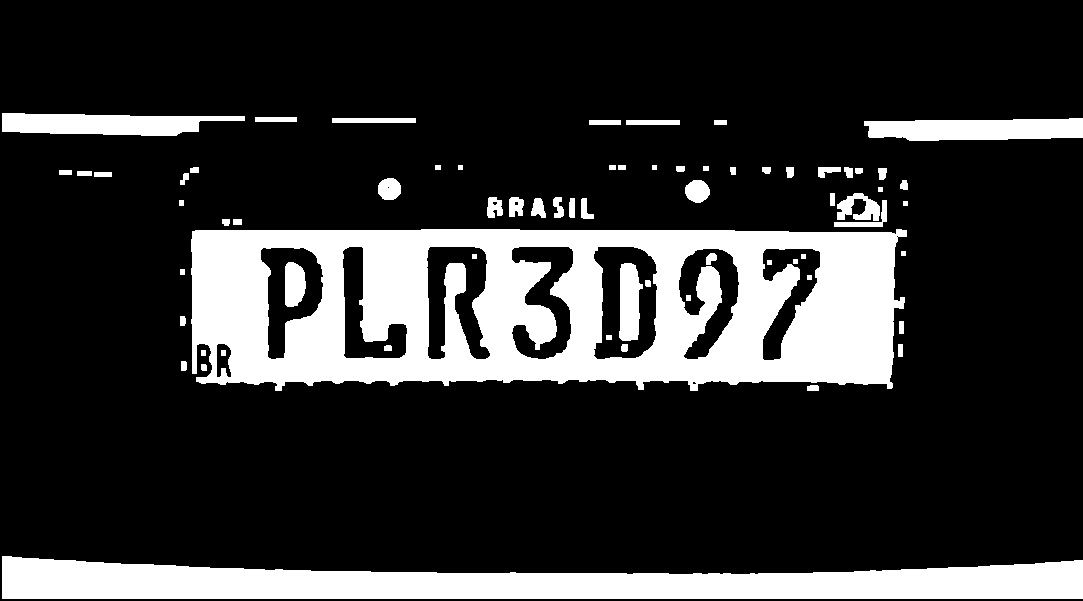

In [28]:
abertura = cv2.morphologyEx(lim_otsu, cv2.MORPH_OPEN, kernel)
cv2_imshow(abertura)

##Fechamento
* Primeiro é feita uma dilatação, para expandir os pixels internos do objeto
* Depois uma erosão, para que o objeto volte ao tamanho normal

O fechamento serve para eliminar os ruídos de dentro do objeto

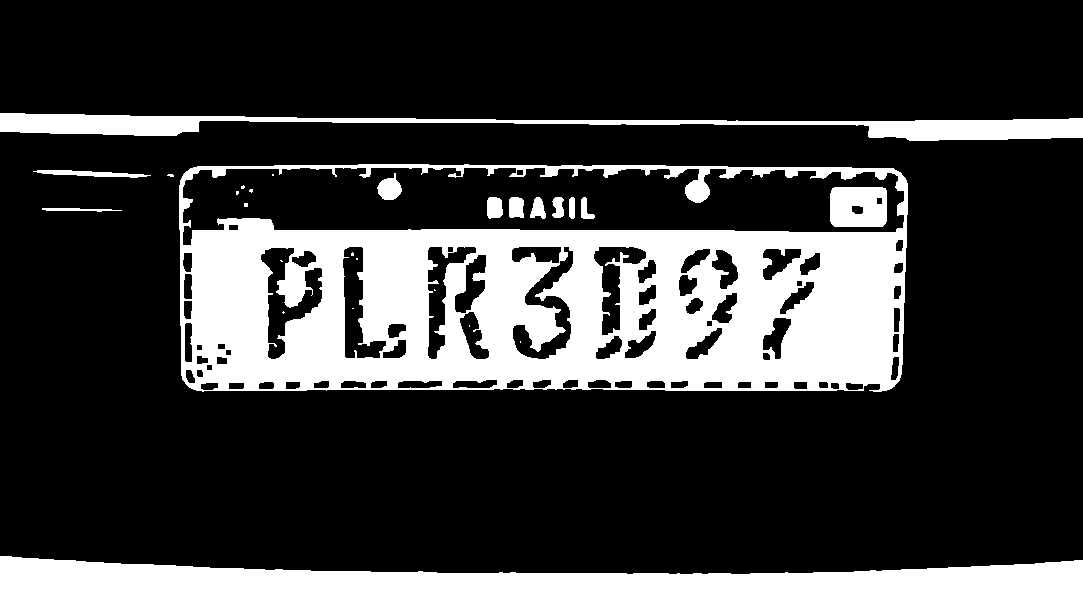

In [29]:
fechamento = cv2.morphologyEx(lim_otsu, cv2.MORPH_CLOSE, kernel)
cv2_imshow(fechamento)

##gradiente morfológico
* É a diferença entre dilatação e erosão de uma imagem;

O resultado é semelhante ao contorno do objeto

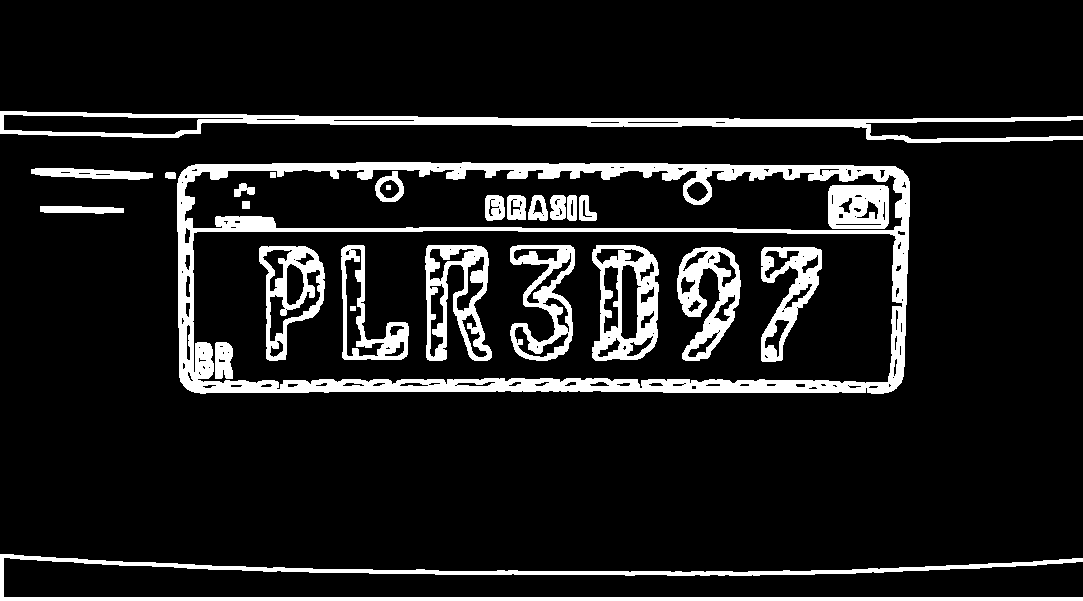

In [30]:
gradiente = cv2.morphologyEx(lim_otsu, cv2.MORPH_GRADIENT, kernel)
cv2_imshow(gradiente)

##Cartola
É a diferença entre a imagem de entrada e a abertura da imagem.

Esta transformação é útil para detectar as regiões claras em um fundo preto

In [31]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))

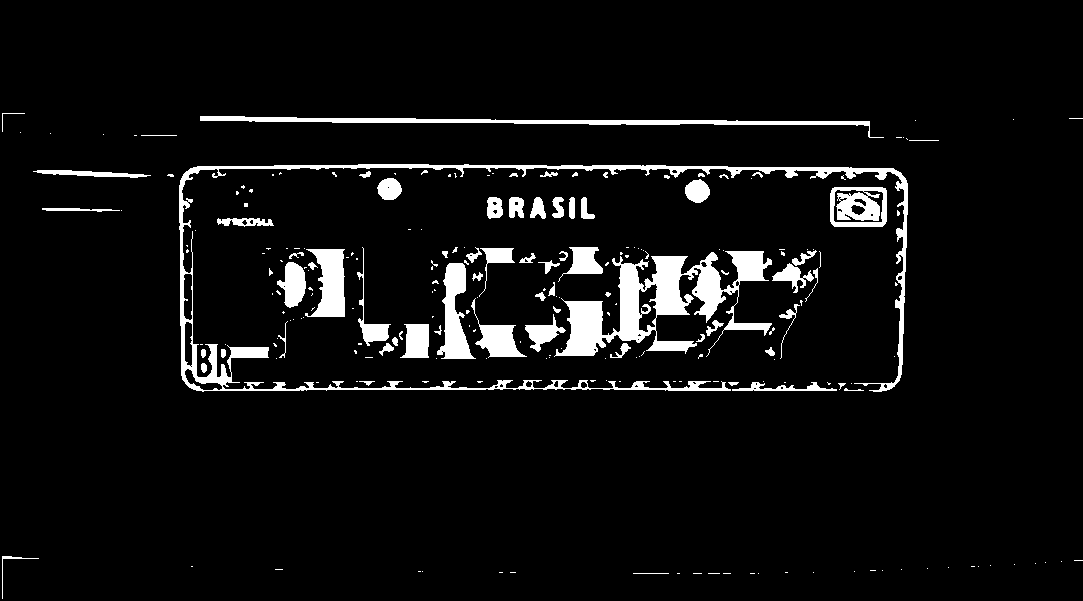

In [32]:
cartola = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel_retangular)
cv2_imshow(cartola)

Aplicação na escala de cinza

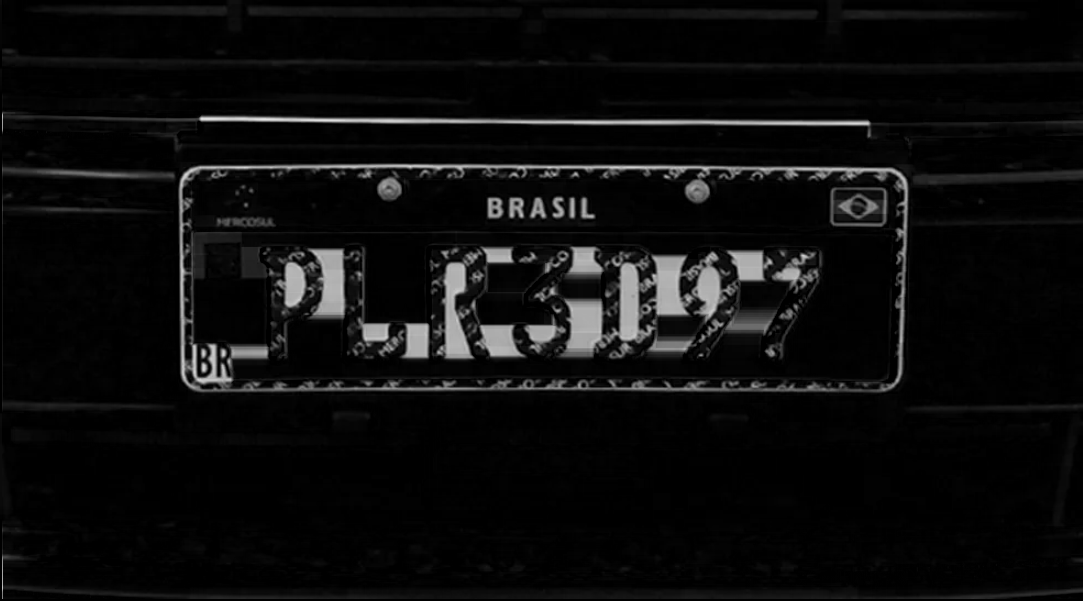

In [33]:
cartola = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel_retangular)
cv2_imshow(cartola)

##Chapéu preto
É a diferença entre o fechamento da imagem de entrada e a imagem de entrada

É o processo inverso do ***Cartola***, ou seja, serve para detectar regiões escuras em um fundo mais claro

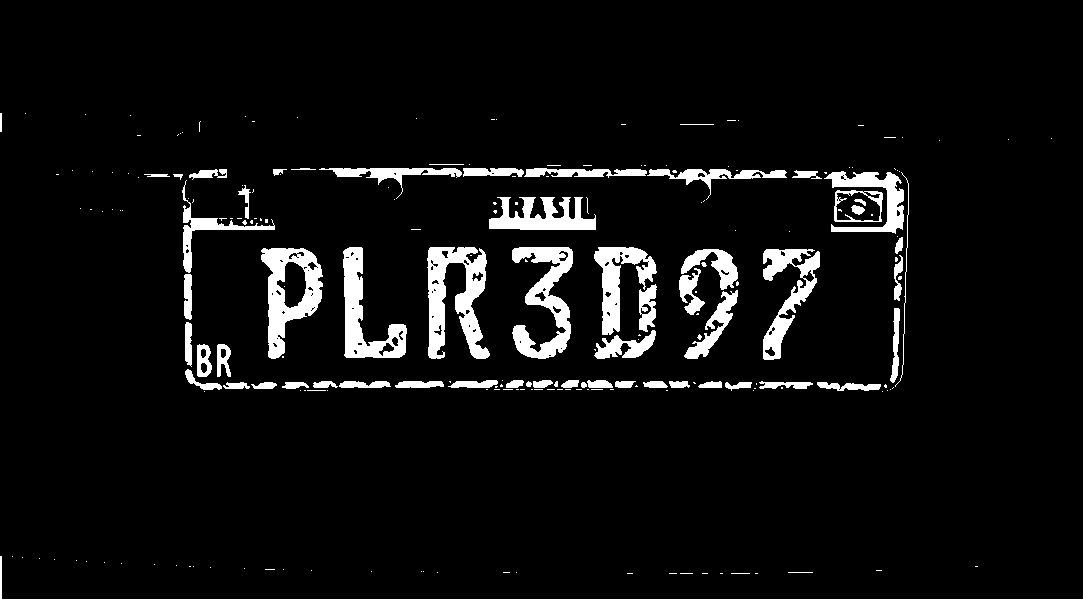

In [34]:
chapeu_preto = cv2.morphologyEx(lim_otsu, cv2.MORPH_BLACKHAT, kernel_retangular)
cv2_imshow(chapeu_preto)

Aplicação na escala de cinza

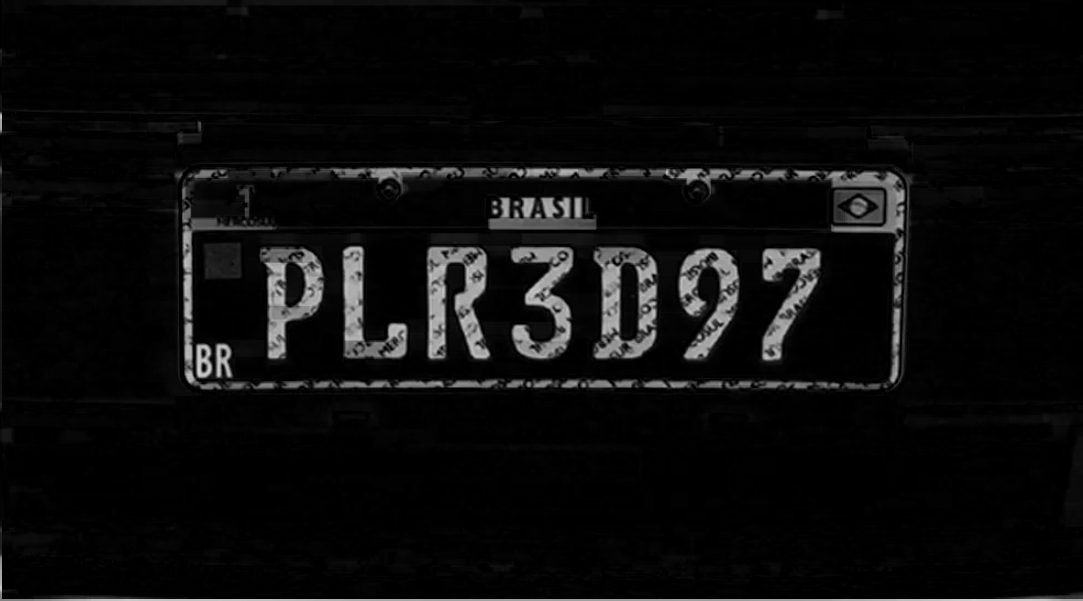

In [35]:
chapeu_preto = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel_retangular)
cv2_imshow(chapeu_preto)

## Testando tesseract erosao


In [36]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(erosao, lang='por', config = config_tesseract)
print(texto)

, PLRSD97 |
— :” NS ss



# Bordas e contornos

## Detecção de bordas de canny

O detector de bordas de Canny é um algoritmo bastante complexo para detectar os contornos dos objetos em uma imagem e passa por uma série de etapas até chegar ao resultado da transformação.

O primeiro passo é a redução de ruídos. Nesse sentido, a detecção de bordas é muito suscetível a ruídos na imagem, que podem interferir na detecção dos objetos de interesse na figura. Inicialmente, é aplicado um filtro de desfoque (GaussianBlur) na imagem para reduzir os ruídos.

O segundo passo é encontrar a intensidade do gradiente na imagem: O gradiente na imagem é a diferença de intensidade de cor em uma determinada direção. O cálculo do gradiente é feito com base na direção horizontal e vertical da figura através de um algoritmo chamado Sobel.

O terceiro passo é fazer uma supressão, pois uma vez feito o cálculo do gradiente, um escaneamento será feito na figura pixel a pixel, checando em cada um dos pixels se o gradiente é o maior valor dentro de uma vizinhança próxima. Caso o pixel tenha uma magnitude do gradiente máxima localmente, este é escolhido como uma borda. Isso resulta em uma imagem com bordas finas dos objetos.

O último passo consiste em fazer um limite de histerese – a histerese é a tendência de um sistema de conservar suas propriedades –, esse passo decidirá quais bordas serão realmente contornos e quais não serão. São escolhidos, portanto, dois valores de limiar: um limiar mínimo e um máximo. Qualquer contorno que tenha uma intensidade de gradiente maior que o limite máximo é mantido como borda. Aqueles que tiverem uma intensidade menor que o limite mínimo serão descartados. Os pixels que tiverem uma gradiente entre os valores mínimo e máximo são mantidos somente se estiverem conectados continuamente a um pixel com gradiente maior que o limite máximo.

Ao utilizar a função Canny da biblioteca OpenCV, é necessário passar como parâmetro a imagem que será feita a transformação e os limites mínimo e máximo do teste de histerese. Os valores utilizados em aula são os mesmos dos exemplos da documentação: 100 para o limite mínimo e 200 para o limite máximo.

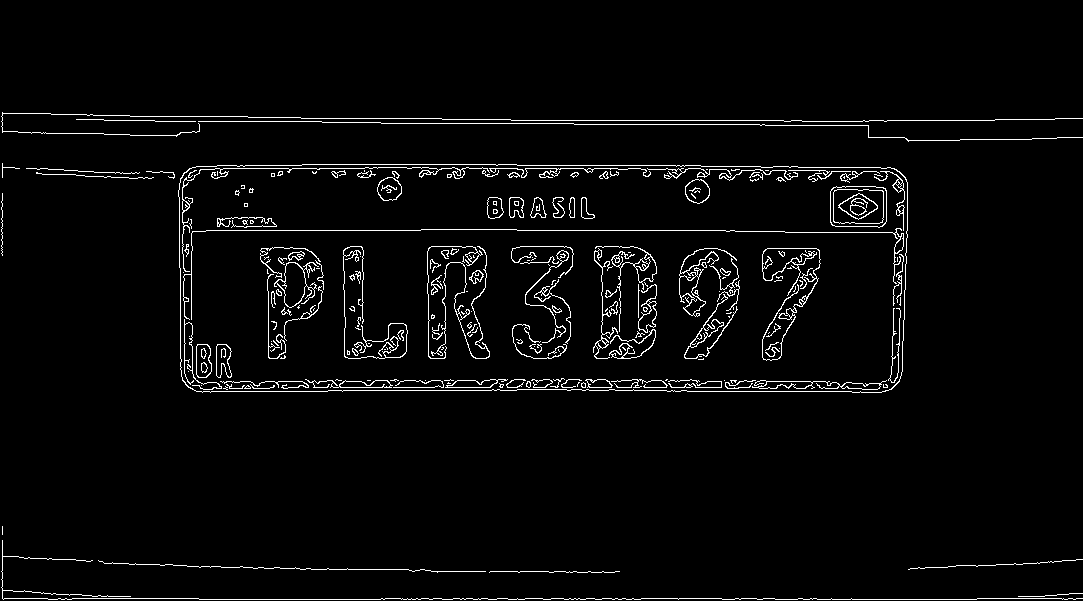

In [37]:
bordas = cv2.Canny(gray, 100, 200)
cv2_imshow(bordas)

In [38]:
# contornos -> as coordenadas dos contornos 
# hierarquia -> quais contornos estão presentes dentro de outros contornos
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE,  cv2.CHAIN_APPROX_SIMPLE)

In [39]:
contornos

(array([[[1069,  593]],
 
        [[1068,  594]],
 
        [[1057,  594]],
 
        [[1056,  595]],
 
        [[1045,  595]],
 
        [[1044,  596]],
 
        [[1018,  596]],
 
        [[1044,  596]],
 
        [[1045,  595]],
 
        [[1056,  595]],
 
        [[1057,  594]],
 
        [[1068,  594]],
 
        [[1069,  593]],
 
        [[1082,  593]]], dtype=int32),
 array([[[490, 571]],
 
        [[489, 572]],
 
        [[490, 571]],
 
        [[517, 571]],
 
        [[518, 572]],
 
        [[519, 572]],
 
        [[520, 571]],
 
        [[548, 571]],
 
        [[549, 572]],
 
        [[553, 572]],
 
        [[554, 571]],
 
        [[565, 571]],
 
        [[566, 572]],
 
        [[568, 572]],
 
        [[569, 571]],
 
        [[570, 572]],
 
        [[572, 572]],
 
        [[573, 571]],
 
        [[576, 571]],
 
        [[577, 572]],
 
        [[587, 572]],
 
        [[588, 571]],
 
        [[590, 571]],
 
        [[591, 572]],
 
        [[601, 572]],
 
        [[602, 571]],
 

##AproxyPoli

Ele aproxima uma forma de controrno a outra forma com menor número de vértices dependendo da precisão que especificamos. É uma implementação do algoritmo Douglas-Peucker

In [40]:
for contorno in contornos:
  episilon = 0.02 * cv2.arcLength(contorno, True)
  aproximacao = cv2.approxPolyDP(contorno, episilon, True)
  if cv2.isContourConvex(aproximacao) and len(aproximacao) ==4:
    localizacao = aproximacao
    break

In [ ]:
localizacao

array([[[180, 178]],

       [[196, 391]],

       [[901, 375]],

       [[894, 168]]], dtype=int32)



Extrair:
* Ponto inicial
*Comprimento
*Altura

In [41]:
x, y, w, h = cv2.boundingRect(localizacao)

In [42]:
x

180

In [43]:
y

168

In [44]:
w

722

In [45]:
h

224

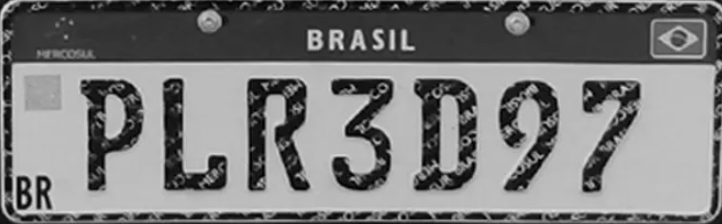

In [46]:
placa = gray[y:y+h, x:x+w]
cv2_imshow(placa)

# Tratamento e extração de texto na imagem
* Limiarização
* Erosão
* Tesseract

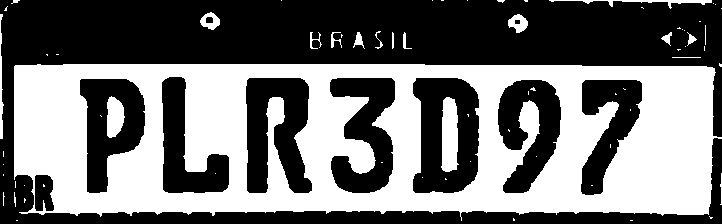

In [47]:
valor, lim_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
erosao = cv2.erode(lim_otsu, cv2.getStructuringElement(cv2.MORPH_RECT, (4,4)))
cv2_imshow(erosao)

In [48]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(erosao, lang='por', config = config_tesseract)
print(texto)

L PLR3D97



## REGEX

In [49]:
import re 
# \w --> busca por letras, dentro das chaves fica a quantidade de letras a serem buscadas 
# \d  --> busca por números, dentro das chaves fica a quantidade de numeros a serem buscados
texto_extraido = re.search('\w{3}\d{1}\w{1}\d{2}', texto)
print(texto_extraido)

<re.Match object; span=(2, 9), match='PLR3D97'>


In [50]:
print(texto_extraido.group(0))

PLR3D97


# Aplicação dos conceitos desenvolvidos

## Abrindo nova imagem na escala de cinza

In [ ]:
imagem = cv2.imread('/content/placa_carro2.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

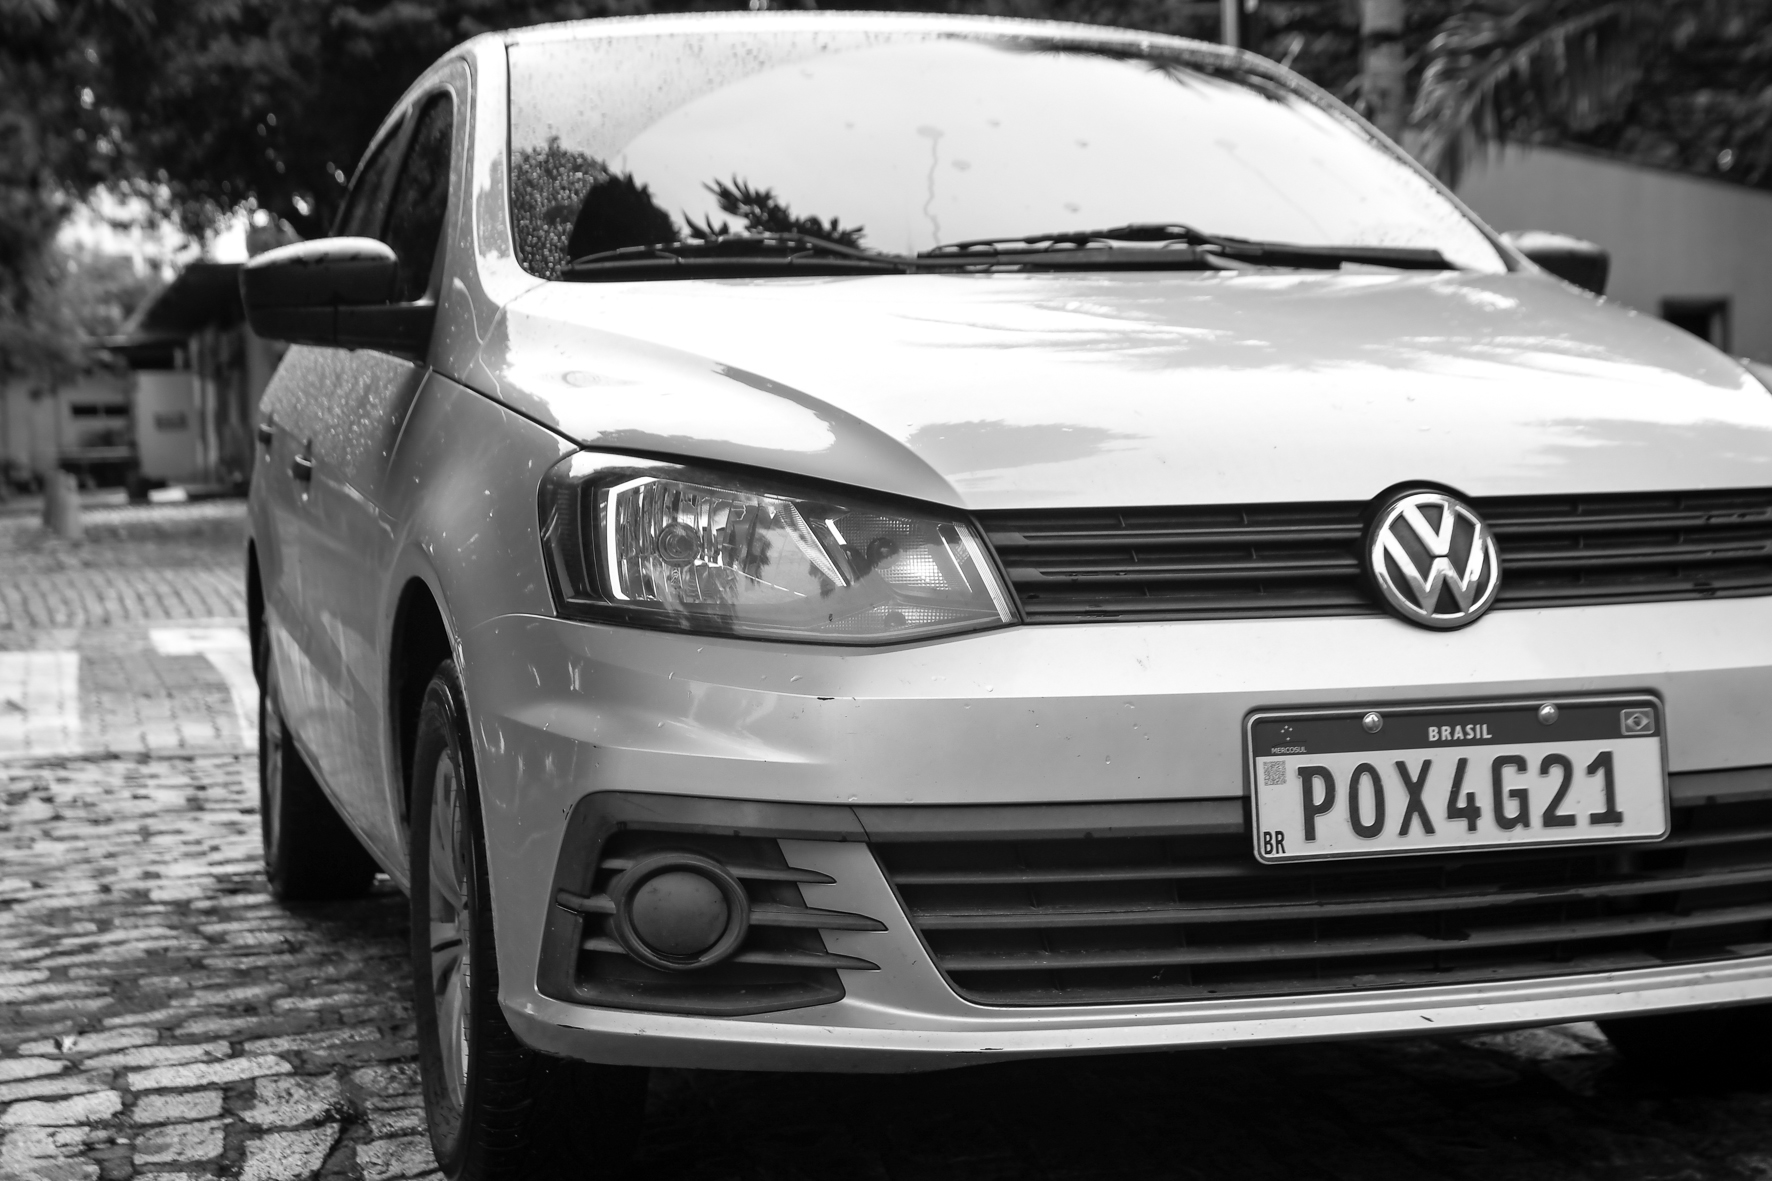

In [ ]:
cv2_imshow(imagem)

## Detectando bordas com canny

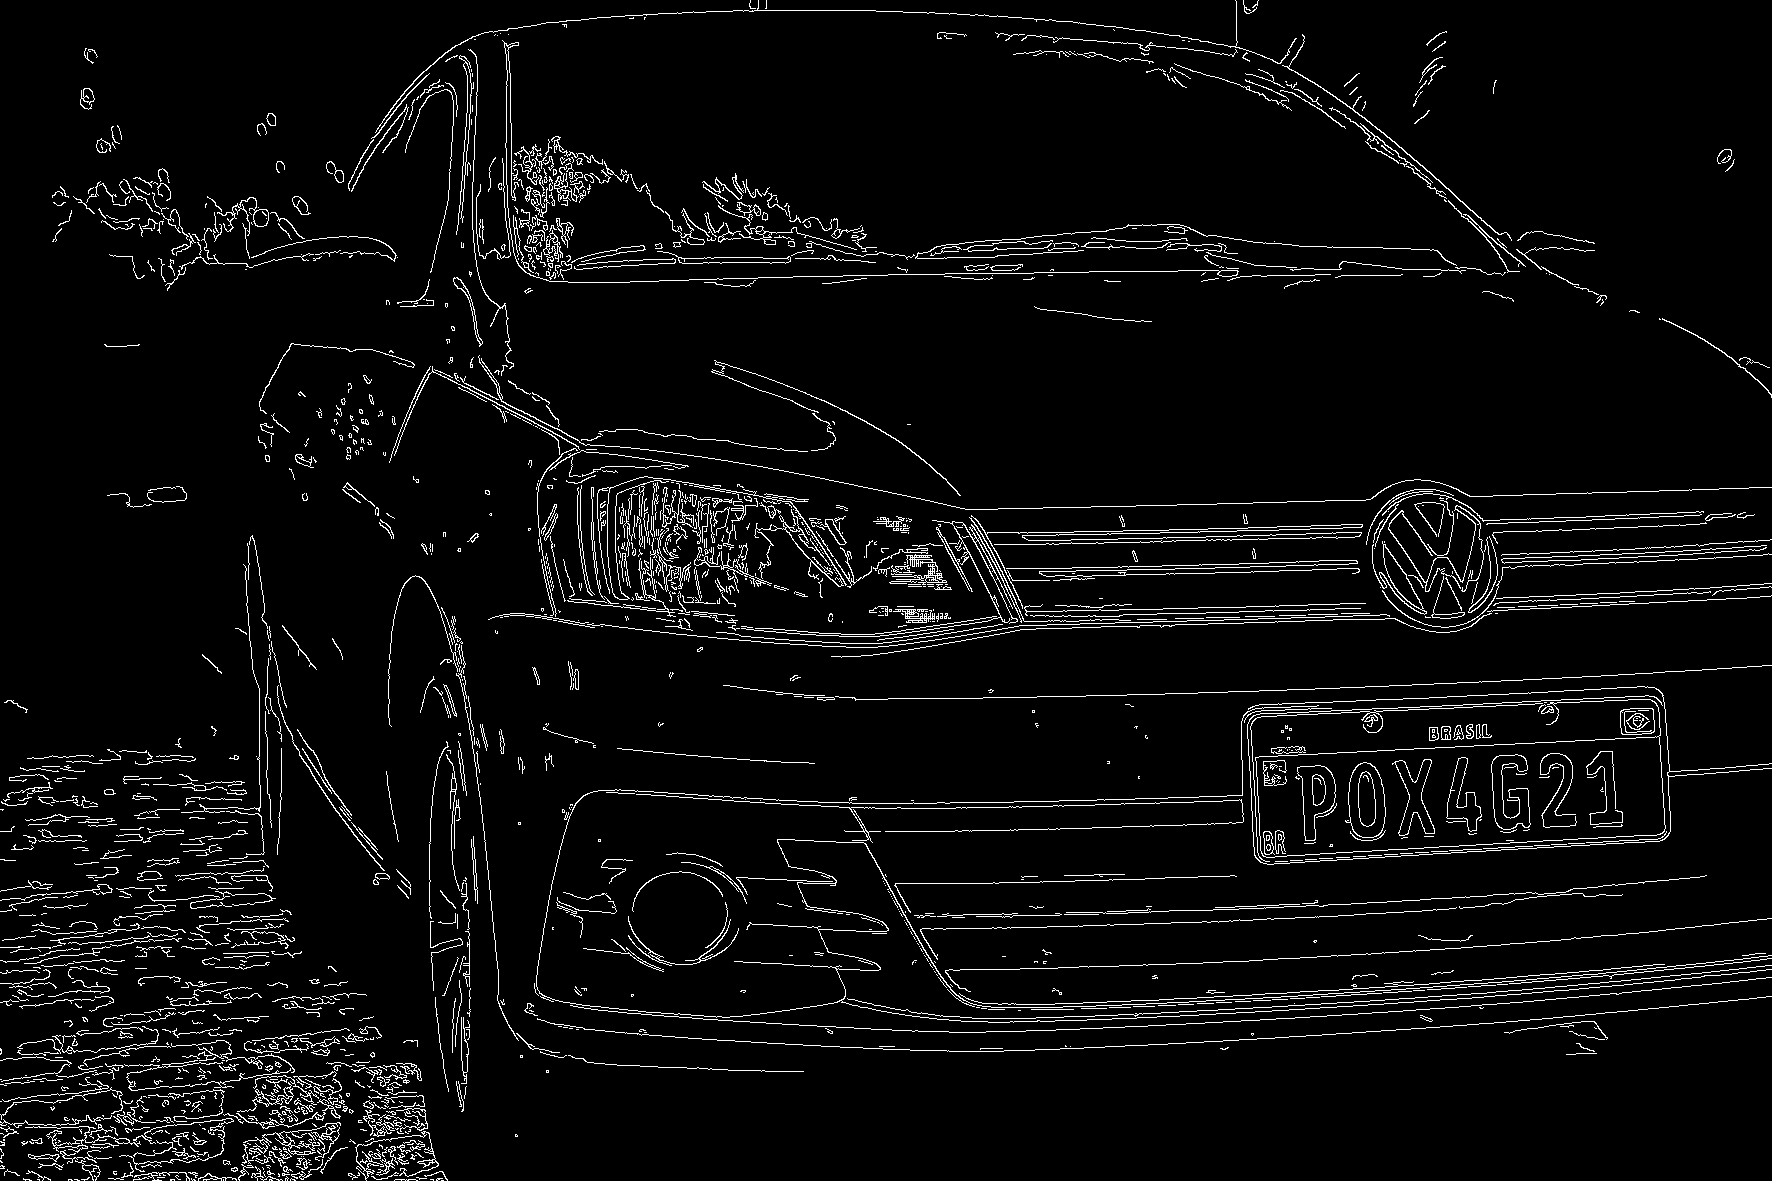

In [ ]:
bordas = cv2.Canny(imagem, 100, 200)
cv2_imshow(bordas)

## Detectando as bordas convexas com 4 lados

In [ ]:
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# ordenando os contornos por tamanho da area
# pegando os 10 maiores contornos
contornos = sorted(contornos, key = cv2.contourArea, reverse=True)[:10]

In [ ]:
for contorno in contornos:
  episilon = 0.02 * cv2.arcLength(contorno, True)
  aproximacao = cv2.approxPolyDP(contorno, episilon, True)
  if cv2.isContourConvex(aproximacao) and len(aproximacao) ==4:
    localizacao = aproximacao
    break

## Definindo localização da placa

In [ ]:
localizacao

array([[[1659,  737]],

       [[1656,  835]],

       [[1260,  850]],

       [[1259,  756]]], dtype=int32)

In [ ]:
x, y, w, h = cv2.boundingRect(localizacao)

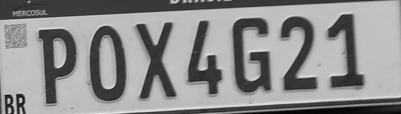

In [ ]:
placa = imagem[y:y+h, x:x+w]
cv2_imshow(placa)

## Limiarização

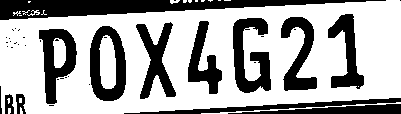

In [ ]:
valor, lim_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(lim_otsu)

## Extração de texto com tesseract

In [ ]:
texto = pytesseract.image_to_string(lim_otsu, lang = 'por', config=config_tesseract)
print(texto)

“POX4G21



## Filtrando texto com regex

In [ ]:
texto_extraido = re.search('\w{3}\d{1}\w{1}\d{2}', texto)
print(texto_extraido.group(0))

POX4G21
